### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB,GaussianNB,CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
train_data = pd.read_csv('SalaryData_Train.csv')
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_data= pd.read_csv('SalaryData_Test.csv')
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Data Understanding

In [4]:
train_data.shape

(30161, 14)

In [5]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [7]:
#Find Value counts for the columns of type 'Object' in the train data
for column in train_data:
    if train_data[column].dtypes=='O':
        print(column)
        print(train_data[column].value_counts())
    else:
        continue

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical  

In [8]:
test_data.shape

(15060, 14)

In [9]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
test_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [11]:
#Find Value counts for the columns of type 'Object' in the test data
for column in test_data:
    if test_data[column].dtypes=='O':
        print(column)
        print(test_data[column].value_counts())
    else:
        continue

workclass
 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
education
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
maritalstatus
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
occupation
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                

### Data Preparation

In [12]:
#Droping unwanted columns for the model Building
train_data.drop(columns =['educationno','relationship','race'],axis=1,inplace=True)

In [13]:
#Dropping unwanted columns for the model Building
test_data.drop(columns =['educationno','relationship','race'],axis=1,inplace=True)

In [14]:
#Finding no of duplicate rows in the train data
train_data[train_data.duplicated()].shape

(4822, 11)

In [15]:
#Droping all duplicate rows in the train data
train_data=train_data.drop_duplicates().reset_index(drop=True)
train_data

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
25334,53,Private,Masters,Married-civ-spouse,Exec-managerial,Male,0,0,40,United-States,>50K
25335,22,Private,Some-college,Never-married,Protective-serv,Male,0,0,40,United-States,<=50K
25336,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,0,0,38,United-States,<=50K
25337,58,Private,HS-grad,Widowed,Adm-clerical,Female,0,0,40,United-States,<=50K


In [16]:
#Finding no of duplicate rows in the test data
test_data[test_data.duplicated()].shape

(1518, 11)

In [17]:
#Droping all duplicate rows in the test data
test_data=test_data.drop_duplicates().reset_index(drop=True)
test_data

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,Never-married,Machine-op-inspct,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Male,7688,0,40,United-States,>50K
4,34,Private,10th,Never-married,Other-service,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
13537,48,Local-gov,Masters,Divorced,Other-service,Male,0,0,40,United-States,<=50K
13538,39,Private,Bachelors,Divorced,Prof-specialty,Female,0,0,36,United-States,<=50K
13539,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Male,0,0,50,United-States,<=50K
13540,44,Private,Bachelors,Divorced,Adm-clerical,Male,5455,0,40,United-States,<=50K


### Data Visualization - Understanding the Features

#### For Visualization purpose - concatenating training and testing data

In [18]:
merged_data=pd.concat([train_data,test_data])
merged_data

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
13537,48,Local-gov,Masters,Divorced,Other-service,Male,0,0,40,United-States,<=50K
13538,39,Private,Bachelors,Divorced,Prof-specialty,Female,0,0,36,United-States,<=50K
13539,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Male,0,0,50,United-States,<=50K
13540,44,Private,Bachelors,Divorced,Adm-clerical,Male,5455,0,40,United-States,<=50K


#### Distplots and Box Plots for Continuous Features

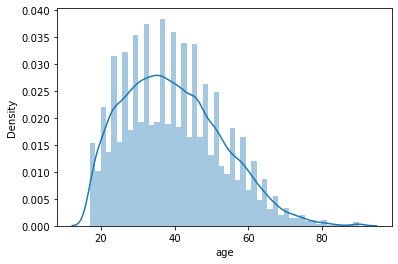

In [19]:
sns.distplot(merged_data['age'])
plt.show()

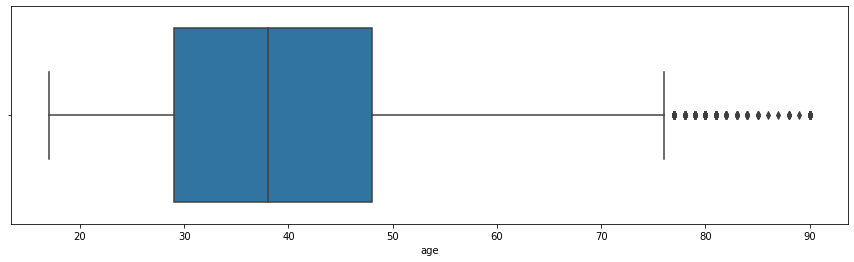

In [20]:
plt.figure(figsize=(15,4))
sns.boxplot(merged_data['age'])
plt.show()

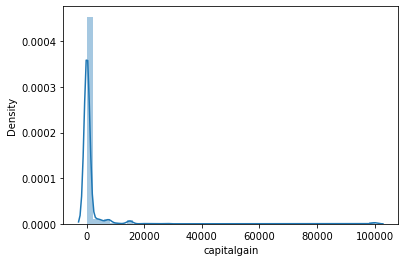

In [21]:
sns.distplot(merged_data['capitalgain'])
plt.show()

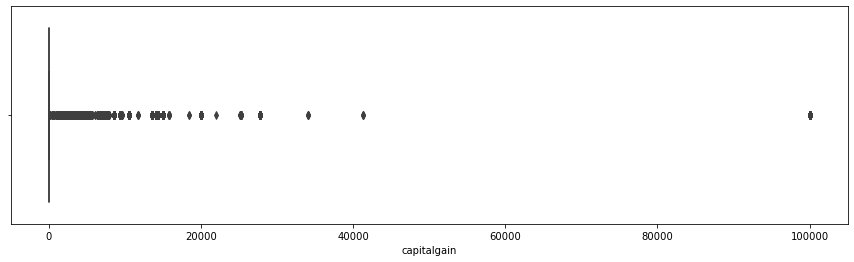

In [22]:
plt.figure(figsize=(15,4))
sns.boxplot(merged_data['capitalgain'])
plt.show()

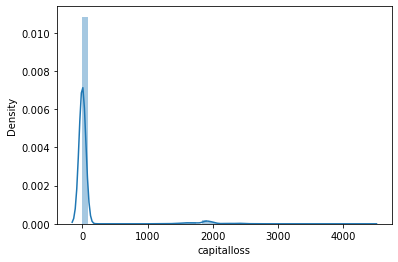

In [23]:
sns.distplot(merged_data['capitalloss'])
plt.show()

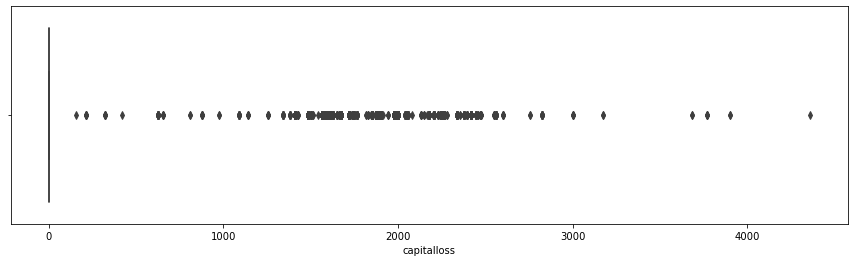

In [24]:
plt.figure(figsize=(15,4))
sns.boxplot(merged_data['capitalloss'])
plt.show()

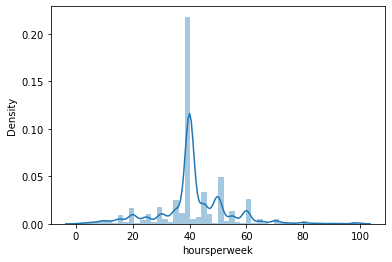

In [25]:
sns.distplot(merged_data['hoursperweek'])
plt.show()

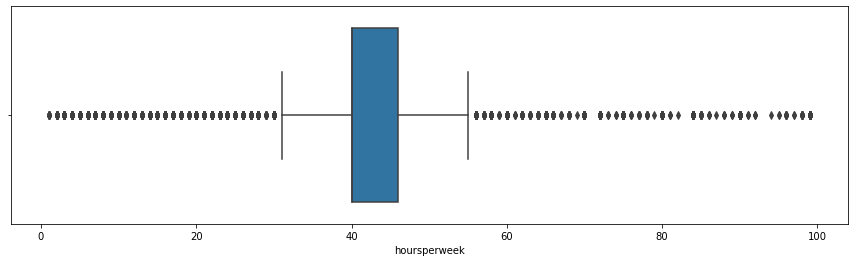

In [26]:
plt.figure(figsize=(15,4))
sns.boxplot(merged_data['hoursperweek'])
plt.show()

#### Pie plots and Count plots for Categorical Features

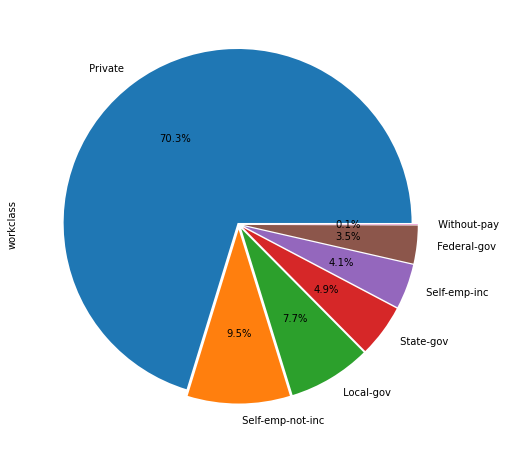

In [27]:
plt.figure(figsize=(8,8))
merged_data['workclass'].value_counts().plot(kind='pie',explode=[0.01,0.03,0.03,0.03,0.03,0.03,0.03],autopct='%.1f%%')
plt.show()

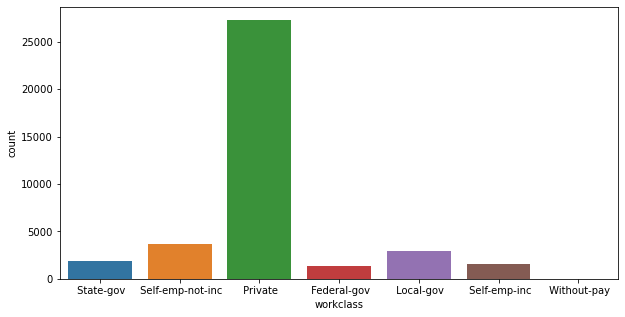

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(merged_data['workclass'])
plt.show()

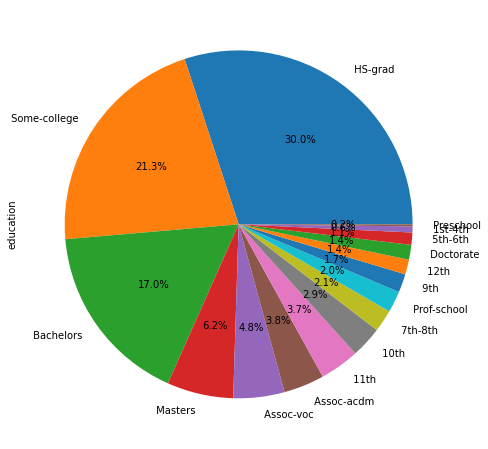

In [29]:
plt.figure(figsize=(8,8))
merged_data['education'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

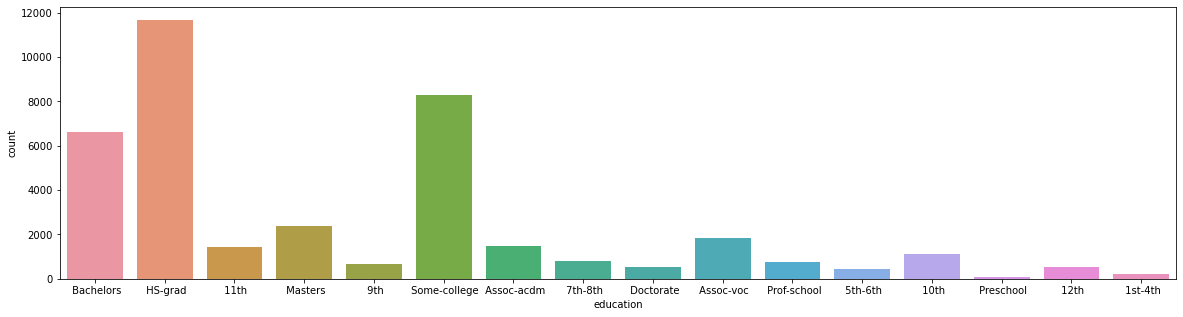

In [30]:
plt.figure(figsize=(20,5))
sns.countplot(merged_data['education'])
plt.show()

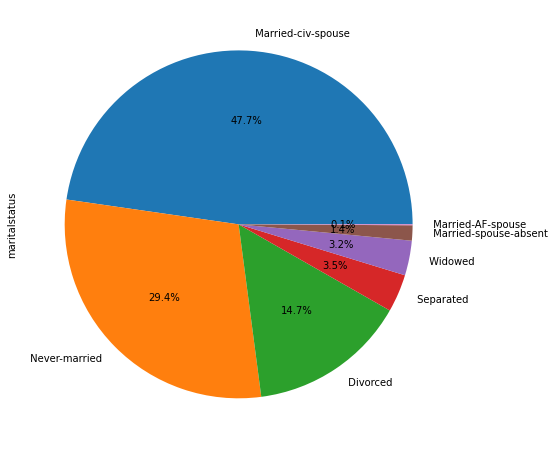

In [31]:
plt.figure(figsize=(8,8))
merged_data['maritalstatus'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

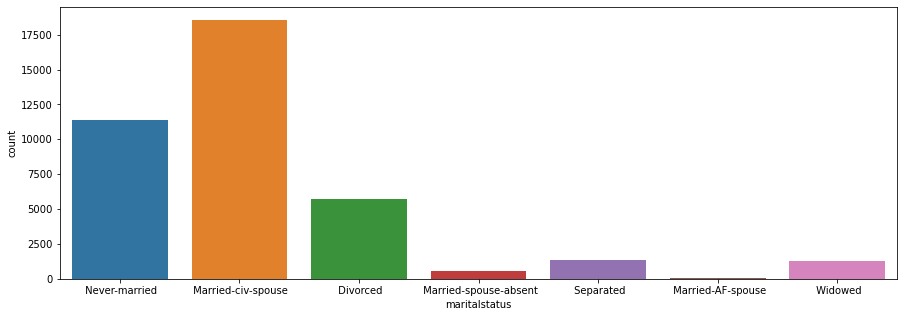

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(merged_data['maritalstatus'])
plt.show()

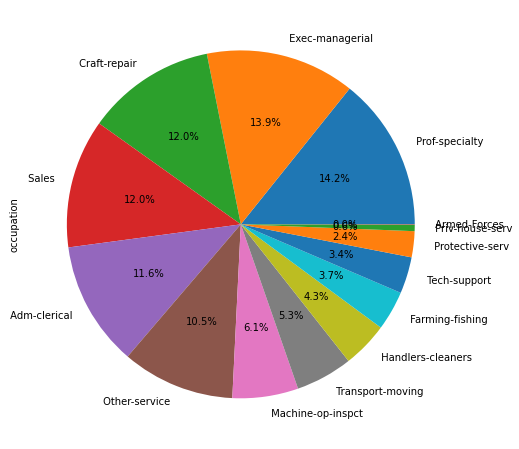

In [33]:
plt.figure(figsize=(8,8))
merged_data['occupation'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

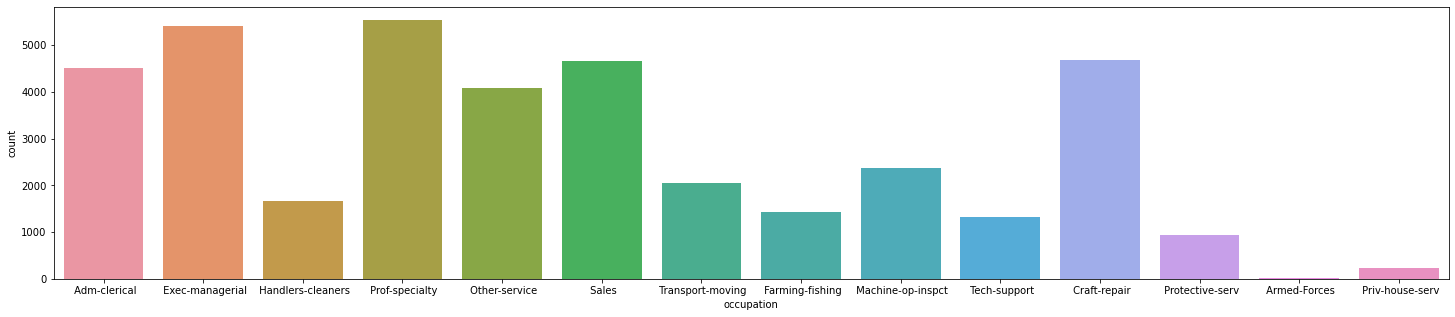

In [34]:
plt.figure(figsize=(25,5))
sns.countplot(merged_data['occupation'])
plt.show()

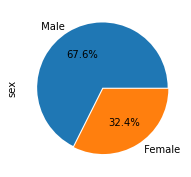

In [35]:
plt.figure(figsize=(3,3))
merged_data['sex'].value_counts().plot(kind='pie',explode=[0.01,0.01],autopct='%.1f%%')
plt.show()

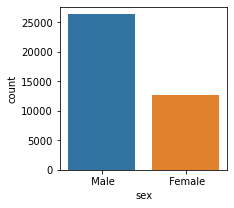

In [36]:
plt.figure(figsize=(3,3))
sns.countplot(merged_data['sex'])
plt.show()

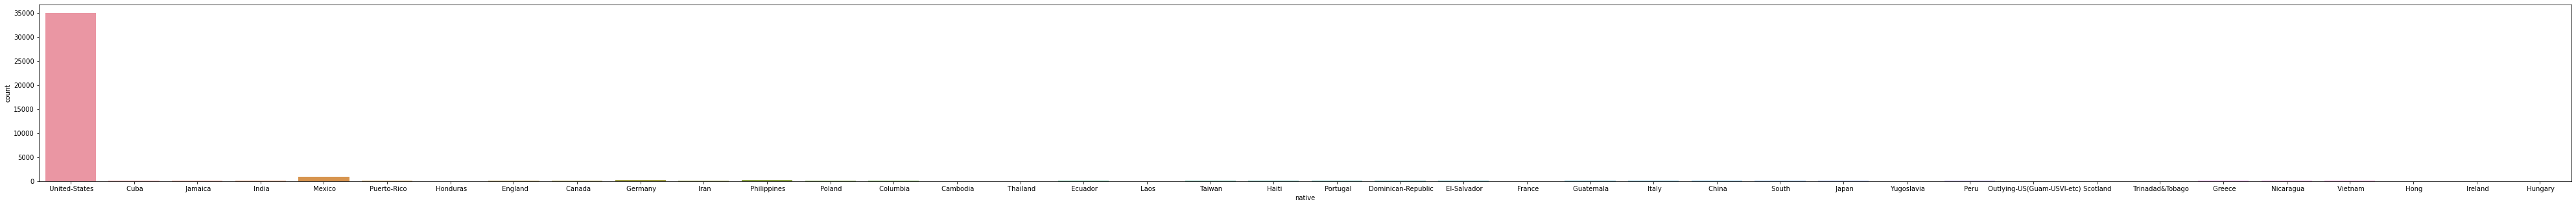

In [37]:
plt.figure(figsize=(70,5))
sns.countplot(merged_data['native'])
plt.show()

In [38]:
#Label Encoding the columns of type 'Object' in the merged data
le=LabelEncoder()
for column in merged_data:
    if merged_data[column].dtypes=='O':
        merged_data[column] = le.fit_transform(merged_data[column])
    else:
        continue
merged_data

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,2174,0,40,37,0
1,50,4,9,2,3,1,0,0,13,37,0
2,38,2,11,0,5,1,0,0,40,37,0
3,53,2,1,2,5,1,0,0,40,37,0
4,28,2,9,2,9,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...
13537,48,1,12,0,7,1,0,0,40,37,0
13538,39,2,9,0,9,0,0,0,36,37,0
13539,38,2,9,2,9,1,0,0,50,37,0
13540,44,2,9,0,0,1,5455,0,40,37,0


In [39]:
#Finding Correlation Matrics to check Multicollinearity
corr=merged_data.corr().round(2)
#Replace diagonal values as 0 from 1
np.fill_diagonal(a=corr.values,val=0)
corr

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,0.00,0.08,0.01,-0.22,-0.01,0.06,0.07,0.05,0.06,0.02,0.21
workclass,0.08,0.00,0.02,-0.03,0.01,0.07,0.03,0.00,0.05,0.01,0.01
education,0.01,0.02,0.00,-0.05,-0.02,-0.02,0.04,0.03,0.06,0.07,0.10
maritalstatus,-0.22,-0.03,-0.05,0.00,0.01,-0.11,-0.04,-0.03,-0.17,-0.03,-0.18
occupation,-0.01,0.01,-0.02,0.01,0.00,0.06,0.02,0.01,0.02,0.01,0.04
sex,0.06,0.07,-0.02,-0.11,0.06,0.00,0.05,0.05,0.23,-0.00,0.21
capitalgain,0.07,0.03,0.04,-0.04,0.02,0.05,0.00,-0.04,0.08,0.01,0.23
capitalloss,0.05,0.00,0.03,-0.03,0.01,0.05,-0.04,0.00,0.05,0.02,0.15
hoursperweek,0.06,0.05,0.06,-0.17,0.02,0.23,0.08,0.05,0.00,0.02,0.22
native,0.02,0.01,0.07,-0.03,0.01,-0.00,0.01,0.02,0.02,0.00,0.03


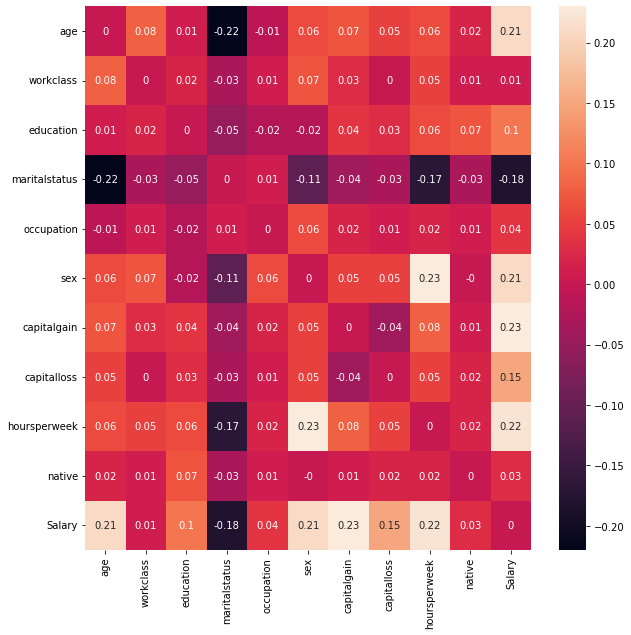

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

#### We can see from Heatmap that there is maximum of 20 % correlation between any two features. Hence, There is less multicollinearity exists

### Model Building

In [41]:
#Splitting the data into X (features) and y (lables)
X_train= train_data.iloc[:,:-1]
y_train= train_data.iloc[:,-1:]
X_test= test_data.iloc[:,:-1]
y_test= test_data.iloc[:,-1:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((25339, 10), (25339, 1), (13542, 10), (13542, 1))

In [42]:
#Label Encoding the columns of type 'Object' in the X_train data
le=LabelEncoder()
for column in X_train:
    if X_train[column].dtypes=='O':
        X_train[column] = le.fit_transform(X_train[column])
    else:
        continue
X_train

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,4,0,1,2174,0,40,37
1,50,4,9,2,3,1,0,0,13,37
2,38,2,11,0,5,1,0,0,40,37
3,53,2,1,2,5,1,0,0,40,37
4,28,2,9,2,9,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...
25334,53,2,12,2,3,1,0,0,40,37
25335,22,2,15,4,10,1,0,0,40,37
25336,27,2,7,2,12,0,0,0,38,37
25337,58,2,11,6,0,0,0,0,40,37


In [43]:
#Label Encoding the columns of type 'Object' in the X_test data
le=LabelEncoder()
for column in X_test:
    if X_test[column].dtypes=='O':
        X_test[column] = le.fit_transform(X_test[column])
    else:
        continue
X_test

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,4,6,1,0,0,40,37
1,38,2,11,2,4,1,0,0,50,37
2,28,1,7,2,10,1,0,0,40,37
3,44,2,15,2,6,1,7688,0,40,37
4,34,2,0,4,7,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...
13537,48,1,12,0,7,1,0,0,40,37
13538,39,2,9,0,9,0,0,0,36,37
13539,38,2,9,2,9,1,0,0,50,37
13540,44,2,9,0,0,1,5455,0,40,37


### Model Training || Prediction || Evaluation

### Categorical Naive Bayes

In [44]:
#Model Training
nb_cat=CategoricalNB()
nb_cat.fit(X_train,y_train)

CategoricalNB()

In [45]:
#Model Prediction
nb_cat_pred=nb_cat.predict(X_test)

In [46]:
confusion_matrix(y_test,nb_cat_pred)

array([[9607,  447],
       [1538, 1950]], dtype=int64)

In [47]:
cat_acc=accuracy_score(y_test,nb_cat_pred)
cat_acc

0.8534189927632551

In [48]:
print(classification_report(y_test,nb_cat_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91     10054
        >50K       0.81      0.56      0.66      3488

    accuracy                           0.85     13542
   macro avg       0.84      0.76      0.78     13542
weighted avg       0.85      0.85      0.84     13542



### Gaussian Naive Bayes

In [49]:
#Model Training
nb_gauss=GaussianNB()
nb_gauss.fit(X_train,y_train)

GaussianNB()

In [50]:
#Model Prediction
nb_gauss_pred=nb_gauss.predict(X_test)

In [51]:
confusion_matrix(y_test,nb_gauss_pred)

array([[9517,  537],
       [2362, 1126]], dtype=int64)

In [52]:
gauss_acc=accuracy_score(y_test,nb_gauss_pred)
gauss_acc

0.785925269531827

In [53]:
print(classification_report(y_test,nb_gauss_pred))

              precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87     10054
        >50K       0.68      0.32      0.44      3488

    accuracy                           0.79     13542
   macro avg       0.74      0.63      0.65     13542
weighted avg       0.77      0.79      0.76     13542



### Multi Nomial Naive Bayes

In [54]:
#Model Training
nb_multi=MultinomialNB()
nb_multi.fit(X_train,y_train)

MultinomialNB()

In [55]:
#Model Prediction
nb_multi_pred=nb_multi.predict(X_test)

In [56]:
confusion_matrix(y_test,nb_multi_pred)

array([[9586,  468],
       [2711,  777]], dtype=int64)

In [57]:
multi_acc=accuracy_score(y_test,nb_multi_pred)
multi_acc

0.7652488554127899

In [58]:
print(classification_report(y_test,nb_multi_pred))

              precision    recall  f1-score   support

       <=50K       0.78      0.95      0.86     10054
        >50K       0.62      0.22      0.33      3488

    accuracy                           0.77     13542
   macro avg       0.70      0.59      0.59     13542
weighted avg       0.74      0.77      0.72     13542



### Consolidated Model Evaluation

In [59]:
consolidated = pd.DataFrame()
consolidated['Models']=pd.Series(['Categorical Naive Bayes','Gaussian Naive Bayes','MultiNomial Naive Bayes'])
consolidated['Accuracy Score']=pd.Series([cat_acc,gauss_acc,multi_acc])
consolidated.sort_values('Accuracy Score',ascending=False)

,Models,Accuracy Score
0,Categorical Naive Bayes,0.853419
1,Gaussian Naive Bayes,0.785925
2,MultiNomial Naive Bayes,0.765249


#### As per Consolidated table, we could observe that Categorical Naive Bayes gives us More Accuracy Score.

### End !!!